# Unsupervised ML - Hierarchical Clustering (Univ.)

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
# import dataset
univ=pd.read_csv('Database/Universities.csv')
univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [3]:
univ2=univ.iloc[:,1:]
univ2

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90
5,1340,89,23,10,32162,95
6,1315,90,30,12,31585,95
7,1255,74,24,12,20126,92
8,1400,91,14,11,39525,97
9,1305,75,44,7,58691,87


In [4]:
# Normalize heterogenous numerical data using z-score (x-mean/std) or custom defined function 
# Normalization function - here custom defined
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [5]:
# Normalized data frame (considering the numerical part of data)
univ2_norm = norm_func(univ2)

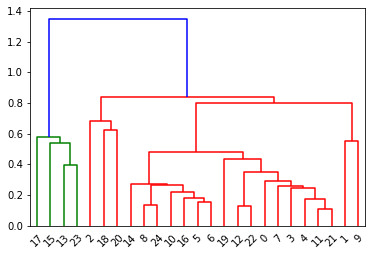

In [6]:
# Create dendrograms
dendrogram=sch.dendrogram(sch.linkage(univ2_norm,method='average'))

In [7]:
# Create Clusters
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')

In [8]:
y=pd.DataFrame(hc.fit_predict(univ2_norm),columns=['clusters'])
y

,clusters
0,3
1,0
2,2
3,3
4,3
5,4
6,4
7,3
8,4
9,0


In [9]:
# Adding clusters to dataset
univ['clusterid']=hc.labels_
univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid
0,Brown,1310,89,22,13,22704,94,3
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,3
4,Cornell,1280,83,33,13,21864,90,3
5,Dartmouth,1340,89,23,10,32162,95,4
6,Duke,1315,90,30,12,31585,95,4
7,Georgetown,1255,74,24,12,20126,92,3
8,Harvard,1400,91,14,11,39525,97,4
9,JohnsHopkins,1305,75,44,7,58691,87,0


In [10]:
# Group data by Clusters (K=5)
univ.groupby('clusterid').agg(['mean']).reset_index()

,clusterid,SAT,Top10,Accept,SFRatio,Expenses,GradRate
,,mean,mean,mean,mean,mean,mean
0,0,1336.666667,83.333333,39.666667,8.666667,53548.666667,85.000000
1,1,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000
2,2,1226.666667,74.000000,55.666667,14.000000,18545.333333,78.333333
3,3,1272.500000,80.625000,33.000000,12.375000,22535.000000,91.125000
4,4,1363.571429,91.428571,21.428571,10.571429,35475.142857,94.571429


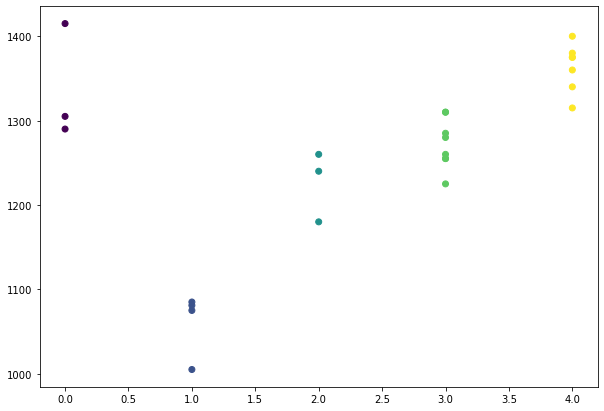

In [11]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(univ['clusterid'],univ['SAT'], c=hc.labels_) 